<a href="https://colab.research.google.com/github/anjay1101/fast.ai/blob/master/Cifar_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#to update repo
!curl https://course.fast.ai/setup/colab | bash


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0   1750      0 --:--:-- --:--:-- --:--:--  1750
Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai import *

In [3]:
path = untar_data(URLs.CIFAR_100)

In [0]:
path_train = path/'train'
path_test = path/'test'

In [0]:
#There seem to be 2 folders, labels in the folder names
data = (ImageList.from_folder(path)
.split_by_folder(valid = 'test')
.label_from_folder()
.transform(get_transforms(), size=32)
.databunch()
.normalize(imagenet_stats))

In [9]:
print(data.classes)
len(data.classes)
print(data.c)

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

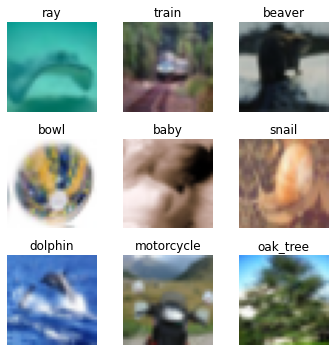

In [23]:
data.show_batch(rows=3, figsize=(5,5))

In [20]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [24]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.279627,2.200509,0.588600,00:34
1,2.366162,2.145780,0.579600,00:34
2,2.224106,2.044944,0.554500,00:34
3,2.099871,1.975793,0.539500,00:34
4,2.053729,1.955096,0.537100,00:34


In [30]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-04
Min loss divided by 10: 1.32E-07


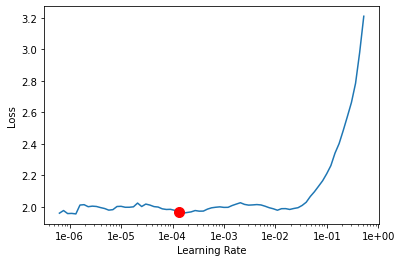

In [31]:
learn.recorder.plot(suggestion=True)

In [0]:
lr = learn.recorder.min_grad_lr

In [33]:
learn.fit_one_cycle(3, max_lr=lr)

epoch,train_loss,valid_loss,error_rate,time
0,1.989549,1.948463,0.531500,00:33
1,1.945731,1.929793,0.527200,00:33
2,1.949389,1.927484,0.528300,00:33


In [0]:
learn.save('%50')

In [0]:
learn.unfreeze()

In [36]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.74E-05
Min loss divided by 10: 7.59E-06


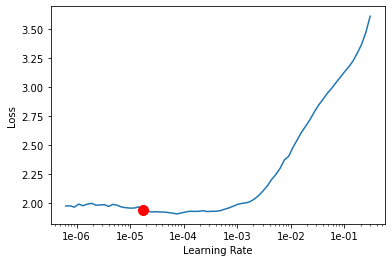

In [37]:
learn.recorder.plot(suggestion=True)

In [38]:
learn.fit_one_cycle(5, slice(1.74e-05,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,1.913710,1.850195,0.510700,00:38
1,1.740925,1.702334,0.474400,00:39
2,1.534872,1.629499,0.456400,00:39
3,1.300396,1.601761,0.449100,00:38
4,1.197092,1.592800,0.447000,00:38


In [0]:
learn.save("0.56%")

In [42]:
learn.fit_one_cycle(3, slice(1.74e-05,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,1.259483,1.619925,0.444900,00:38
1,1.115926,1.589878,0.439200,00:38
2,0.917094,1.588838,0.433100,00:38


In [0]:
learn.save(".57%")

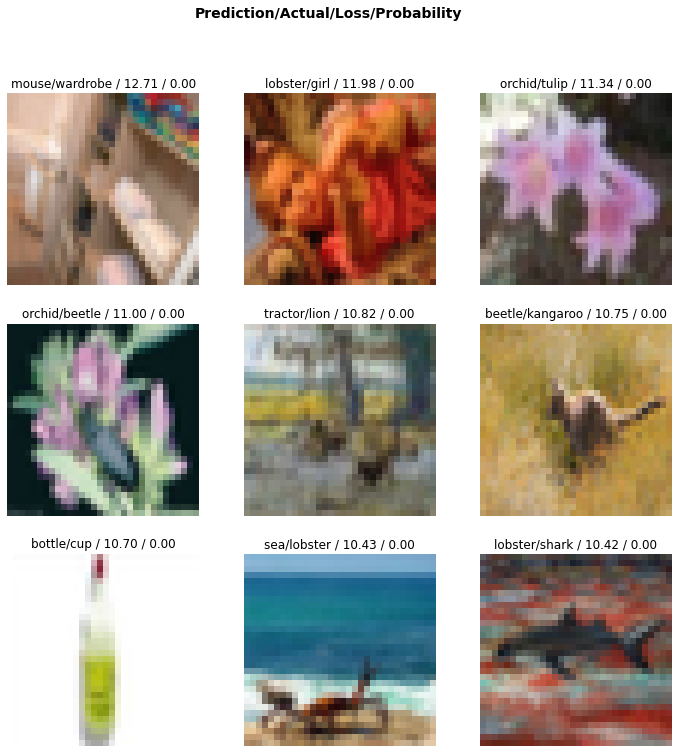

In [45]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9)

Hmmm. I guess 57% isn't too good, but it's not so bad either